In [111]:
import numpy as np
import pandas as pd
from pandas import Series, DataFrame
pd.set_option('display.float_format', lambda x: '%.2f' % x)
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats             import ttest_1samp,ttest_ind, wilcoxon, shapiro, levene
from statsmodels.stats.power import ttest_power

# Problem 1

## Wholesale Customers Analysis (Download Data)

In [3]:
df = pd.read_csv('Wholesale+Customers+Data.csv')
df

,Buyer/Spender,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
0,1,Retail,Other,12669,9656,7561,214,2674,1338
1,2,Retail,Other,7057,9810,9568,1762,3293,1776
2,3,Retail,Other,6353,8808,7684,2405,3516,7844
3,4,Hotel,Other,13265,1196,4221,6404,507,1788
4,5,Retail,Other,22615,5410,7198,3915,1777,5185
...,...,...,...,...,...,...,...,...,...
435,436,Hotel,Other,29703,12051,16027,13135,182,2204
436,437,Hotel,Other,39228,1431,764,4510,93,2346
437,438,Retail,Other,14531,15488,30243,437,14841,1867
438,439,Hotel,Other,10290,1981,2232,1038,168,2125


In [4]:
df.head()

,Buyer/Spender,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
0,1,Retail,Other,12669,9656,7561,214,2674,1338
1,2,Retail,Other,7057,9810,9568,1762,3293,1776
2,3,Retail,Other,6353,8808,7684,2405,3516,7844
3,4,Hotel,Other,13265,1196,4221,6404,507,1788
4,5,Retail,Other,22615,5410,7198,3915,1777,5185


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440 entries, 0 to 439
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Buyer/Spender     440 non-null    int64 
 1   Channel           440 non-null    object
 2   Region            440 non-null    object
 3   Fresh             440 non-null    int64 
 4   Milk              440 non-null    int64 
 5   Grocery           440 non-null    int64 
 6   Frozen            440 non-null    int64 
 7   Detergents_Paper  440 non-null    int64 
 8   Delicatessen      440 non-null    int64 
dtypes: int64(7), object(2)
memory usage: 31.1+ KB


### A wholesale distributor operating in different regions of Portugal has information on annual spending of several items in their stores across different regions and channels. The data consists of 440 large retailers’ annual spending on 6 different varieties of products in 3 different regions (Lisbon, Oporto, Other) and across different sales channel (Hotel, Retail).

### 1.1 Use methods of descriptive statistics to summarize data. Which Region and which Channel spent the most? Which Region and which Channel spent the least?

In [7]:
for column in df[['Fresh', 'Milk','Grocery','Frozen','Detergents_Paper','Delicatessen']]:
    columnSeriesObj = df[column]
    print('Column Name : ', column)
    print('Minimum Value : ', columnSeriesObj.min())
    print('25% = ',columnSeriesObj.quantile(0.25))
    print('50% or Median= ',columnSeriesObj.quantile(0.5))
    print('75% = ',columnSeriesObj.quantile(0.75))
    print('Maximum Value = ',columnSeriesObj.max())
    print('IQR = ',stats.iqr(columnSeriesObj))
    print('----------------------------------')

Column Name :  Fresh
Minimum Value :  3
25% =  3127.75
50% or Median=  8504.0
75% =  16933.75
Maximum Value =  112151
IQR =  13806.0
----------------------------------
Column Name :  Milk
Minimum Value :  55
25% =  1533.0
50% or Median=  3627.0
75% =  7190.25
Maximum Value =  73498
IQR =  5657.25
----------------------------------
Column Name :  Grocery
Minimum Value :  3
25% =  2153.0
50% or Median=  4755.5
75% =  10655.75
Maximum Value =  92780
IQR =  8502.75
----------------------------------
Column Name :  Frozen
Minimum Value :  25
25% =  742.25
50% or Median=  1526.0
75% =  3554.25
Maximum Value =  60869
IQR =  2812.0
----------------------------------
Column Name :  Detergents_Paper
Minimum Value :  3
25% =  256.75
50% or Median=  816.5
75% =  3922.0
Maximum Value =  40827
IQR =  3665.25
----------------------------------
Column Name :  Delicatessen
Minimum Value :  3
25% =  408.25
50% or Median=  965.5
75% =  1820.25
Maximum Value =  47943
IQR =  1412.0
------------------------

In [6]:
df.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Buyer/Spender,440.00,NaN,NaN,NaN,220.50,127.16,1.00,110.75,220.50,330.25,440.00
Channel,440,2,Hotel,298,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Region,440,3,Other,316,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Fresh,440.00,NaN,NaN,NaN,12000.30,12647.33,3.00,3127.75,8504.00,16933.75,112151.00
Milk,440.00,NaN,NaN,NaN,5796.27,7380.38,55.00,1533.00,3627.00,7190.25,73498.00
Grocery,440.00,NaN,NaN,NaN,7951.28,9503.16,3.00,2153.00,4755.50,10655.75,92780.00
Frozen,440.00,NaN,NaN,NaN,3071.93,4854.67,25.00,742.25,1526.00,3554.25,60869.00
Detergents_Paper,440.00,NaN,NaN,NaN,2881.49,4767.85,3.00,256.75,816.50,3922.00,40827.00
Delicatessen,440.00,NaN,NaN,NaN,1524.87,2820.11,3.00,408.25,965.50,1820.25,47943.00


In [8]:
df['Total_spending'] = df['Fresh'] + df['Milk'] + df['Grocery'] + df['Frozen'] + df['Detergents_Paper'] + df['Delicatessen']
df #adding new column total spending

,Buyer/Spender,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen,Total_spending
0,1,Retail,Other,12669,9656,7561,214,2674,1338,34112
1,2,Retail,Other,7057,9810,9568,1762,3293,1776,33266
2,3,Retail,Other,6353,8808,7684,2405,3516,7844,36610
3,4,Hotel,Other,13265,1196,4221,6404,507,1788,27381
4,5,Retail,Other,22615,5410,7198,3915,1777,5185,46100
...,...,...,...,...,...,...,...,...,...,...
435,436,Hotel,Other,29703,12051,16027,13135,182,2204,73302
436,437,Hotel,Other,39228,1431,764,4510,93,2346,48372
437,438,Retail,Other,14531,15488,30243,437,14841,1867,77407
438,439,Hotel,Other,10290,1981,2232,1038,168,2125,17834


In [9]:
df_region=df.groupby(["Region"]).sum() #creating new dataset with region
df_region

,Buyer/Spender,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen,Total_spending
Region,,,,,,,,
Lisbon,18095,854833,422454,570037,231026,204136,104327,2386813
Oporto,14899,464721,239144,433274,190132,173311,54506,1555088
Other,64026,3960577,1888759,2495251,930492,890410,512110,10677599


In [10]:
df_channel=df.groupby(df["Channel"]).sum() #creating new dataset with channel
df_channel

,Buyer/Spender,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen,Total_spending
Channel,,,,,,,,
Hotel,71034,4015717,1028614,1180717,1116979,235587,421955,7999569
Retail,25986,1264414,1521743,2317845,234671,1032270,248988,6619931


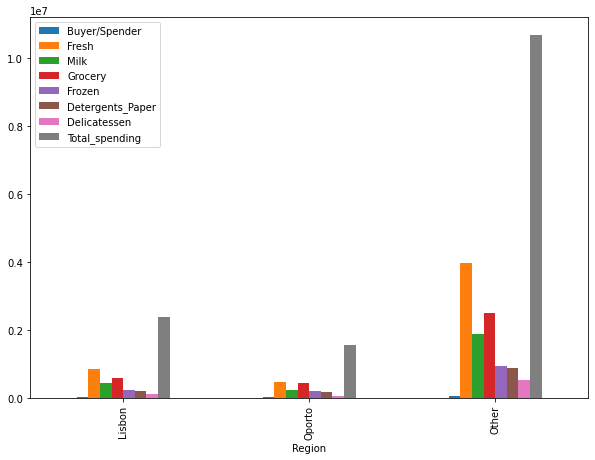

In [11]:
df_region.plot(kind='bar',figsize=(10,7));

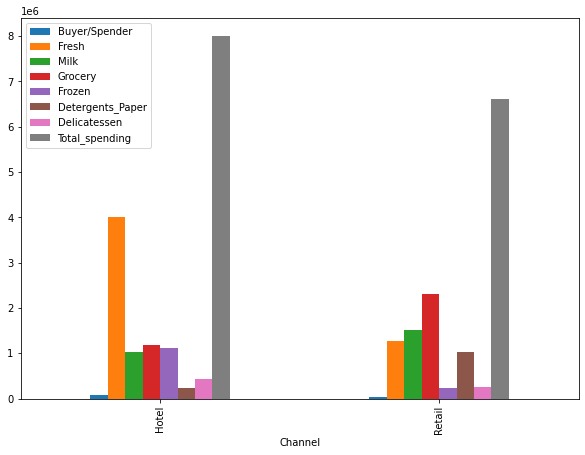

In [12]:
df_channel.plot(kind='bar',figsize=(10,7));

In [13]:
df_channel_updated=pd.DataFrame(df.groupby(["Region","Channel"])['Total_spending'].sum())
df_channel_updated #creating new dataset with channel w.r.t.total spending

Total_spending
Region Channel                
Lisbon Hotel           1538342
       Retail           848471
Oporto Hotel            719150
       Retail           835938
Other  Hotel           5742077
       Retail          4935522

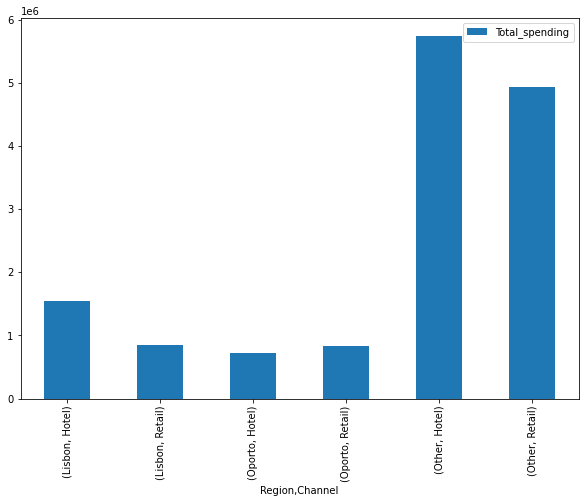

In [15]:
df_channel_updated.plot(kind='bar',figsize=(10,7));

### 1.2 There are 6 different varieties of items that are considered. Describe and comment/explain all the varieties across Region and Channel? Provide a detailed justification for your answer.

In [14]:
df_region_new=df_region.drop(['Total_spending','Buyer/Spender'],axis=1) #removing total spending as per question
df_region_new

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
Region,,,,,,
Lisbon,854833,422454,570037,231026,204136,104327
Oporto,464721,239144,433274,190132,173311,54506
Other,3960577,1888759,2495251,930492,890410,512110


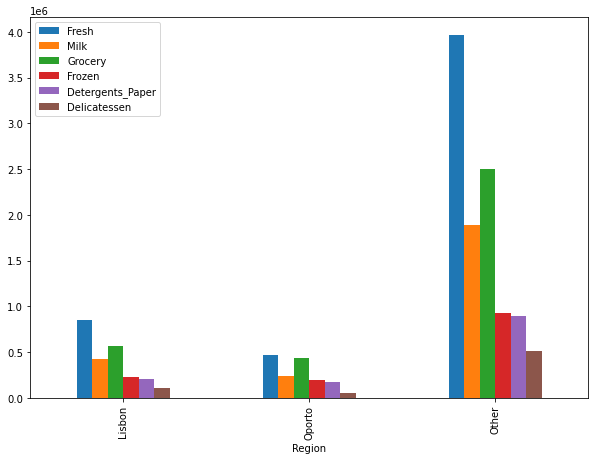

In [16]:
df_region_new.plot(kind='bar',figsize=(10,7));

In [17]:
df_channel_new=df_channel.drop(['Total_spending','Buyer/Spender'],axis=1) #removing total spending as per question
df_channel_new

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
Channel,,,,,,
Hotel,4015717,1028614,1180717,1116979,235587,421955
Retail,1264414,1521743,2317845,234671,1032270,248988


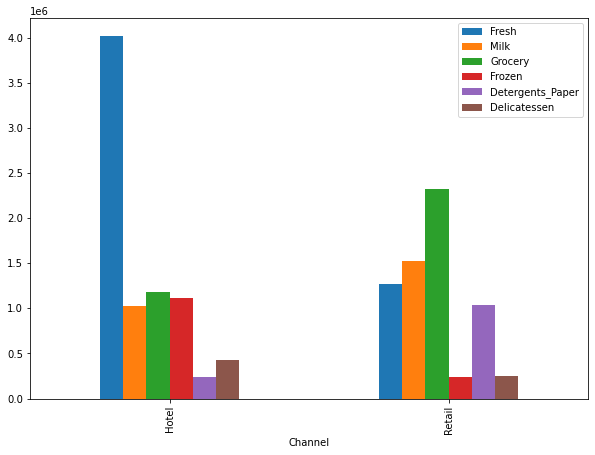

In [18]:
df_channel_new.plot(kind='bar',figsize=(10,7));

### 1.3 On the basis of a descriptive measure of variability, which item shows the most inconsistent behaviour? Which items show the least inconsistent behaviour?

In [19]:
df.head()

,Buyer/Spender,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen,Total_spending
0,1,Retail,Other,12669,9656,7561,214,2674,1338,34112
1,2,Retail,Other,7057,9810,9568,1762,3293,1776,33266
2,3,Retail,Other,6353,8808,7684,2405,3516,7844,36610
3,4,Hotel,Other,13265,1196,4221,6404,507,1788,27381
4,5,Retail,Other,22615,5410,7198,3915,1777,5185,46100


In [20]:
df_new=df.copy()

In [21]:
df_new.drop(['Buyer/Spender','Total_spending'],axis=1,inplace=True) #removing buyer/spender and total spending
df_new

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
0,Retail,Other,12669,9656,7561,214,2674,1338
1,Retail,Other,7057,9810,9568,1762,3293,1776
2,Retail,Other,6353,8808,7684,2405,3516,7844
3,Hotel,Other,13265,1196,4221,6404,507,1788
4,Retail,Other,22615,5410,7198,3915,1777,5185
...,...,...,...,...,...,...,...,...
435,Hotel,Other,29703,12051,16027,13135,182,2204
436,Hotel,Other,39228,1431,764,4510,93,2346
437,Retail,Other,14531,15488,30243,437,14841,1867
438,Hotel,Other,10290,1981,2232,1038,168,2125


In [22]:
df_new.std()

C:\Users\USER\AppData\Local\Temp\ipykernel_18860\4208695933.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df_new.std()


Fresh              12647.33
Milk                7380.38
Grocery             9503.16
Frozen              4854.67
Detergents_Paper    4767.85
Delicatessen        2820.11
dtype: float64

In [23]:
df_new.mean()

C:\Users\USER\AppData\Local\Temp\ipykernel_18860\1212866955.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df_new.mean()


Fresh              12000.30
Milk                5796.27
Grocery             7951.28
Frozen              3071.93
Detergents_Paper    2881.49
Delicatessen        1524.87
dtype: float64

In [24]:
covariance = df_new.std()/df_new.mean() #calculating co-eff variance
covariance 

C:\Users\USER\AppData\Local\Temp\ipykernel_18860\4001315052.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  covariance = df_new.std()/df_new.mean()


Fresh              1.05
Milk               1.27
Grocery            1.20
Frozen             1.58
Detergents_Paper   1.65
Delicatessen       1.85
dtype: float64

### 1.4 Are there any outliers in the data? Back up your answer with a suitable plot/technique with the help of detailed comments.

In [25]:
Q1 =df_new.quantile(0.25) #calculating IQR
Q3 = df_new.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

Fresh              13806.00
Milk                5657.25
Grocery             8502.75
Frozen              2812.00
Detergents_Paper    3665.25
Delicatessen        1412.00
dtype: float64


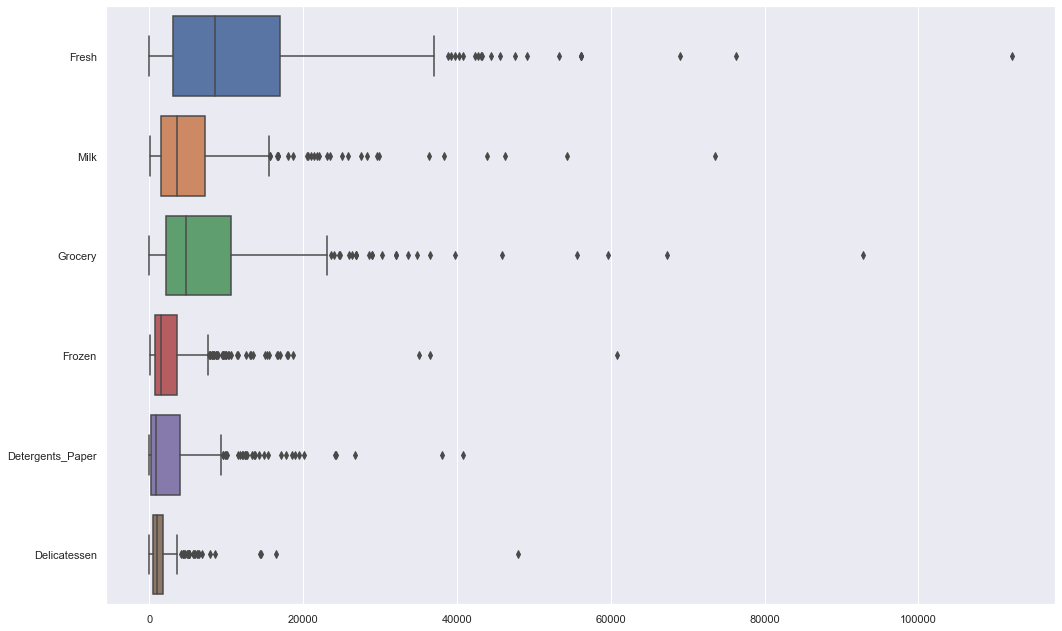

In [27]:
sns.set(rc={'figure.figsize':(17,11)}) #creating boxplot for outliers
sns.boxplot(data=df_new,orient='h');

In [28]:
df_outlier = (df_new < (Q1 - 1.5 * IQR)) |(df_new > (Q3 + 1.5 * IQR))
df_outlier.head() #checking outlier as per condition

C:\Users\USER\AppData\Local\Temp\ipykernel_18860\2914064806.py:1: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version. Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  df_outlier = (df_new < (Q1 - 1.5 * IQR)) |(df_new > (Q3 + 1.5 * IQR))


,Channel,Delicatessen,Detergents_Paper,Fresh,Frozen,Grocery,Milk,Region
0,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False
2,False,True,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False
4,False,True,False,False,False,False,False,False


# Problem 2

### The Student News Service at Clear Mountain State University (CMSU) has decided to gather data about the undergraduate students that attend CMSU. CMSU creates and distributes a survey of 14 questions and receives responses from 62 undergraduates (stored in the Survey data set).

In [29]:
survey = pd.read_csv('Survey.csv')
survey

,ID,Gender,Age,Class,Major,Grad Intention,GPA,Employment,Salary,Social Networking,Satisfaction,Spending,Computer,Text Messages
0,1,Female,20,Junior,Other,Yes,2.90,Full-Time,50.00,1,3,350,Laptop,200
1,2,Male,23,Senior,Management,Yes,3.60,Part-Time,25.00,1,4,360,Laptop,50
2,3,Male,21,Junior,Other,Yes,2.50,Part-Time,45.00,2,4,600,Laptop,200
3,4,Male,21,Junior,CIS,Yes,2.50,Full-Time,40.00,4,6,600,Laptop,250
4,5,Male,23,Senior,Other,Undecided,2.80,Unemployed,40.00,2,4,500,Laptop,100
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
57,58,Female,21,Senior,International Business,No,2.40,Part-Time,40.00,1,3,1000,Laptop,10
58,59,Female,20,Junior,CIS,No,2.90,Part-Time,40.00,2,4,350,Laptop,250
59,60,Female,20,Sophomore,CIS,No,2.50,Part-Time,55.00,1,4,500,Laptop,500
60,61,Female,23,Senior,Accounting,Yes,3.50,Part-Time,30.00,2,3,490,Laptop,50


In [30]:
survey.head()

,ID,Gender,Age,Class,Major,Grad Intention,GPA,Employment,Salary,Social Networking,Satisfaction,Spending,Computer,Text Messages
0,1,Female,20,Junior,Other,Yes,2.90,Full-Time,50.00,1,3,350,Laptop,200
1,2,Male,23,Senior,Management,Yes,3.60,Part-Time,25.00,1,4,360,Laptop,50
2,3,Male,21,Junior,Other,Yes,2.50,Part-Time,45.00,2,4,600,Laptop,200
3,4,Male,21,Junior,CIS,Yes,2.50,Full-Time,40.00,4,6,600,Laptop,250
4,5,Male,23,Senior,Other,Undecided,2.80,Unemployed,40.00,2,4,500,Laptop,100


In [31]:
survey.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   ID                 62 non-null     int64  
 1   Gender             62 non-null     object 
 2   Age                62 non-null     int64  
 3   Class              62 non-null     object 
 4   Major              62 non-null     object 
 5   Grad Intention     62 non-null     object 
 6   GPA                62 non-null     float64
 7   Employment         62 non-null     object 
 8   Salary             62 non-null     float64
 9   Social Networking  62 non-null     int64  
 10  Satisfaction       62 non-null     int64  
 11  Spending           62 non-null     int64  
 12  Computer           62 non-null     object 
 13  Text Messages      62 non-null     int64  
dtypes: float64(2), int64(6), object(6)
memory usage: 6.9+ KB


In [35]:
survey.describe(include = 'all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
ID,62.00,NaN,NaN,NaN,31.50,18.04,1.00,16.25,31.50,46.75,62.00
Gender,62,2,Female,33,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Age,62.00,NaN,NaN,NaN,21.13,1.43,18.00,20.00,21.00,22.00,26.00
Class,62,3,Senior,31,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Major,62,8,Retailing/Marketing,14,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Grad Intention,62,3,Yes,28,NaN,NaN,NaN,NaN,NaN,NaN,NaN
GPA,62.00,NaN,NaN,NaN,3.13,0.38,2.30,2.90,3.15,3.40,3.90
Employment,62,3,Part-Time,43,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Salary,62.00,NaN,NaN,NaN,48.55,12.08,25.00,40.00,50.00,55.00,80.00
Social Networking,62.00,NaN,NaN,NaN,1.52,0.84,0.00,1.00,1.00,2.00,4.00


## 2.1. For this data, construct the following contingency tables (Keep Gender as row variable)

### 2.1.1. Gender and Major

In [37]:
data_crosstab1 =pd.crosstab(survey['Gender'], survey['Major'], margins=True)
data_crosstab1

Major,Accounting,CIS,Economics/Finance,International Business,Management,Other,Retailing/Marketing,Undecided,All
Gender,,,,,,,,,
Female,3,3,7,4,4,3,9,0,33
Male,4,1,4,2,6,4,5,3,29
All,7,4,11,6,10,7,14,3,62


### 2.1.2. Gender and Grad Intention

In [38]:
data_crosstab2 =pd.crosstab(survey['Gender'], survey['Grad Intention'], margins=True)
data_crosstab2

Grad Intention,No,Undecided,Yes,All
Gender,,,,
Female,9,13,11,33
Male,3,9,17,29
All,12,22,28,62


### 2.1.3. Gender and Employment

In [40]:
data_crosstab3 =pd.crosstab(survey['Gender'], survey['Employment'], margins=True)
data_crosstab3

Employment,Full-Time,Part-Time,Unemployed,All
Gender,,,,
Female,3,24,6,33
Male,7,19,3,29
All,10,43,9,62


### 2.1.4. Gender and Computer

In [41]:
data_crosstab4 =pd.crosstab(survey['Gender'], survey['Computer'], margins=True)
data_crosstab4

Computer,Desktop,Laptop,Tablet,All
Gender,,,,
Female,2,29,2,33
Male,3,26,0,29
All,5,55,2,62


## 2.2. Assume that the sample is representative of the population of CMSU. Based on the data, answer the following question:

### 2.2.1. What is the probability that a randomly selected CMSU student will be male?

In [44]:
total_no_of_male = len(survey.loc[survey['Gender']=='Male'])
total_no_of_male

29

In [50]:
total_no_of_people = survey.shape[0]
total_no_of_people

62

In [52]:
prob_of_male = (total_no_of_male/total_no_of_people)*100
prob_of_male

46.774193548387096

In [54]:
#the probability that a randomly selected CMSU student will be male is 46.77%

### 2.2.2. What is the probability that a randomly selected CMSU student will be female?

In [55]:
total_no_of_female = len(survey.loc[survey['Gender']=='Female'])
total_no_of_female

33

In [56]:
total_no_of_people = survey.shape[0]
total_no_of_people

62

In [57]:
prob_of_female = (total_no_of_female/total_no_of_people)*100
prob_of_female

53.2258064516129

In [58]:
#the probability that a randomly selected CMSU student will be male is 53.22%

## 2.3. Assume that the sample is representative of the population of CMSU. Based on the data, answer the following question:

### 2.3.1. Find the conditional probability of different majors among the male students in CMSU.

In [59]:
data_crosstab1 =pd.crosstab(survey['Gender'], survey['Major'], margins=True)
data_crosstab1

Major,Accounting,CIS,Economics/Finance,International Business,Management,Other,Retailing/Marketing,Undecided,All
Gender,,,,,,,,,
Female,3,3,7,4,4,3,9,0,33
Male,4,1,4,2,6,4,5,3,29
All,7,4,11,6,10,7,14,3,62


In [60]:
data_crosstab5 =pd.crosstab(survey['Gender'], survey['Major'], margins=True,normalize='index')
data_crosstab5

Major,Accounting,CIS,Economics/Finance,International Business,Management,Other,Retailing/Marketing,Undecided
Gender,,,,,,,,
Female,0.09,0.09,0.21,0.12,0.12,0.09,0.27,0.00
Male,0.14,0.03,0.14,0.07,0.21,0.14,0.17,0.10
All,0.11,0.06,0.18,0.10,0.16,0.11,0.23,0.05


### 2.3.2 Find the conditional probability of different majors among the female students of CMSU.

In [61]:
data_crosstab5 =pd.crosstab(survey['Gender'], survey['Major'], margins=True,normalize='index')
data_crosstab5

Major,Accounting,CIS,Economics/Finance,International Business,Management,Other,Retailing/Marketing,Undecided
Gender,,,,,,,,
Female,0.09,0.09,0.21,0.12,0.12,0.09,0.27,0.00
Male,0.14,0.03,0.14,0.07,0.21,0.14,0.17,0.10
All,0.11,0.06,0.18,0.10,0.16,0.11,0.23,0.05


## 2.4. Assume that the sample is a representative of the population of CMSU. Based on the data, answer the following question:

### 2.4.1. Find the probability That a randomly chosen student is a male and intends to graduate.

In [62]:
data_crosstab2 =pd.crosstab(survey['Gender'], survey['Grad Intention'], margins=True)
data_crosstab2

Grad Intention,No,Undecided,Yes,All
Gender,,,,
Female,9,13,11,33
Male,3,9,17,29
All,12,22,28,62


In [63]:
data_crosstab6 =pd.crosstab(survey['Gender'], survey['Grad Intention'], margins=True, normalize='index')
data_crosstab6

Grad Intention,No,Undecided,Yes
Gender,,,
Female,0.27,0.39,0.33
Male,0.10,0.31,0.59
All,0.19,0.35,0.45


In [64]:
#from crosstab

In [65]:
male_intend_graduate = 17
total_no_of_male = 29
prob_male_intend_graduate = (17/29)*100
prob_male_intend_graduate

58.620689655172406

In [75]:
#therefore the probability of male intend to graduate is 59%

### 2.4.2 Find the probability that a randomly selected student is a female and does NOT have a laptop.

In [68]:
data_crosstab4 =pd.crosstab(survey['Gender'], survey['Computer'], margins=True)
data_crosstab4

Computer,Desktop,Laptop,Tablet,All
Gender,,,,
Female,2,29,2,33
Male,3,26,0,29
All,5,55,2,62


In [69]:
data_crosstab7 =pd.crosstab(survey['Gender'], survey['Computer'], margins=True, normalize='index')
data_crosstab7

Computer,Desktop,Laptop,Tablet
Gender,,,
Female,0.06,0.88,0.06
Male,0.10,0.90,0.00
All,0.08,0.89,0.03


In [70]:
#from contingency table

In [71]:
female_with_laptop = 29
total_no_of_female = 33
prob_female_with_laptop = (29/33)*100
prob_female_with_laptop

87.87878787878788

In [74]:
pro_female_without_laptop = 100 - prob_female_with_laptop
pro_female_without_laptop

12.121212121212125

In [76]:
#therefore the probability that a randomly selected student is a female and does NOT have a laptop is 12%

## 2.5. Assume that the sample is representative of the population of CMSU. Based on the data, answer the following question:

### 2.5.1. Find the probability that a randomly chosen student is a male or has full-time employment?

In [77]:
prob_of_male

46.774193548387096

In [78]:
data_crosstab3 =pd.crosstab(survey['Gender'], survey['Employment'], margins=True)
data_crosstab3

Employment,Full-Time,Part-Time,Unemployed,All
Gender,,,,
Female,3,24,6,33
Male,7,19,3,29
All,10,43,9,62


In [ ]:
#from contingency table

In [80]:
pro_having_job = (10/62)*100
pro_having_job

16.129032258064516

In [81]:
male_with_full_employment = (7/62)*100
male_with_full_employment

11.29032258064516

In [82]:
prob_male_or_full_employment = prob_of_male + pro_having_job - male_with_full_employment
prob_male_or_full_employment

51.612903225806456

In [83]:
#therefore probability that a randomly chosen student is a male or has full-time employment is 51.61%

### 2.5.2. Find the conditional probability that given a female student is randomly chosen, she is majoring in international business or management.

In [84]:
data_crosstab1 =pd.crosstab(survey['Gender'], survey['Major'], margins=True)
data_crosstab1

Major,Accounting,CIS,Economics/Finance,International Business,Management,Other,Retailing/Marketing,Undecided,All
Gender,,,,,,,,,
Female,3,3,7,4,4,3,9,0,33
Male,4,1,4,2,6,4,5,3,29
All,7,4,11,6,10,7,14,3,62


In [85]:
#from contingency table

In [86]:
prob_female_intnl_busns = (4/33)*100
prob_female_intnl_busns

12.121212121212121

In [87]:
prob_female_mngmnt = (4/33)*100
prob_female_mngmnt

12.121212121212121

In [88]:
prob_intnl_busns_mngmnt = prob_female_intnl_busns + prob_female_mngmnt
prob_intnl_busns_mngmnt

24.242424242424242

In [89]:
#conditional probability that given a female student is randomly chosen, she is majoring in international business or management is 24.24%

## 2.6.  Construct a contingency table of Gender and Intent to Graduate at 2 levels (Yes/No). The Undecided students are not considered now and the table is a 2x2 table. Do you think the graduate intention and being female are independent events?

In [90]:
survey_new = survey.drop(survey[survey['Grad Intention'] == 'Undecided'].index)
survey_new.head()

,ID,Gender,Age,Class,Major,Grad Intention,GPA,Employment,Salary,Social Networking,Satisfaction,Spending,Computer,Text Messages
0,1,Female,20,Junior,Other,Yes,2.90,Full-Time,50.00,1,3,350,Laptop,200
1,2,Male,23,Senior,Management,Yes,3.60,Part-Time,25.00,1,4,360,Laptop,50
2,3,Male,21,Junior,Other,Yes,2.50,Part-Time,45.00,2,4,600,Laptop,200
3,4,Male,21,Junior,CIS,Yes,2.50,Full-Time,40.00,4,6,600,Laptop,250
8,9,Female,20,Junior,Management,Yes,3.60,Unemployed,30.00,0,4,500,Laptop,400


In [91]:
data_crosstab8 =pd.crosstab(survey_new['Gender'] , survey_new['Grad Intention'] ,margins =True)
data_crosstab8

Grad Intention,No,Yes,All
Gender,,,
Female,9,11,20
Male,3,17,20
All,12,28,40


In [92]:
data_crosstab9 =pd.crosstab(survey_new['Gender'] , survey_new['Grad Intention'] ,margins =True, normalize='index')
data_crosstab9

Grad Intention,No,Yes
Gender,,
Female,0.45,0.55
Male,0.15,0.85
All,0.30,0.70


In [93]:
#from contingency table

In [94]:
prob_female = 20/40
prob_female 

0.5

In [95]:
prob_female_int_grad = 11/20
prob_female_int_grad

0.55

In [96]:
#prob_female != prob_female_int_grad, therefore the events are not independant events

## 2.7. Note that there are four numerical (continuous) variables in the data set, GPA, Salary, Spending, and Text Messages.
## Answer the following questions based on the data

### 2.7.1. If a student is chosen randomly, what is the probability that his/her GPA is less than 3?

In [98]:
No_of_stud_less_3 = len(survey.loc[survey['GPA'] < 3])
print(No_of_stud_less_3)

17


In [99]:
total_no_of_students = 62
prob_gpa_less_3 = (No_of_stud_less_3/total_no_of_students)*100
prob_gpa_less_3

27.419354838709676

### 2.7.2. Find the conditional probability that a randomly selected male earns 50 or more. Find the conditional probability that a randomly selected female earns 50 or more.

In [104]:
male_earn_more50 = ((survey['Gender']=='Male') & (survey['Salary'] >= 50)).sum()
male_earn_more50

14

In [105]:
total_no_male = 29
prob_male_more50 = (male_earn_more50/total_no_male)*100
prob_male_more50

48.275862068965516

In [106]:
female_earn_more50 = ((survey['Gender']=='Female') & (survey['Salary'] >= 50)).sum()
female_earn_more50

18

In [108]:
total_no_female = 33
prob_female_more50 = (female_earn_more50/total_no_female)*100
prob_female_more50

54.54545454545454

## 2.8. Note that there are four numerical (continuous) variables in the data set, GPA, Salary, Spending, and Text Messages. For each of them comment whether they follow a normal distribution. Write a note summarizing your conclusions

C:\Users\USER\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


skew value of GPA is -0.3146000894506981
Shapiro resul of GPA is  ShapiroResult(statistic=0.9685361981391907, pvalue=0.11204058676958084)


C:\Users\USER\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\USER\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


skew value of Salary is 0.5347008436225946
Shapiro resul of Salary is  ShapiroResult(statistic=0.9565856456756592, pvalue=0.028000956401228905)
skew value of Spending is 1.5859147414045331
Shapiro resul of Spending is  ShapiroResult(statistic=0.8777452111244202, pvalue=1.6854661225806922e-05)


C:\Users\USER\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


skew value of Text Message is 1.2958079731054333
Shapiro resul of Text Messages is  ShapiroResult(statistic=0.8594191074371338, pvalue=4.324040673964191e-06)


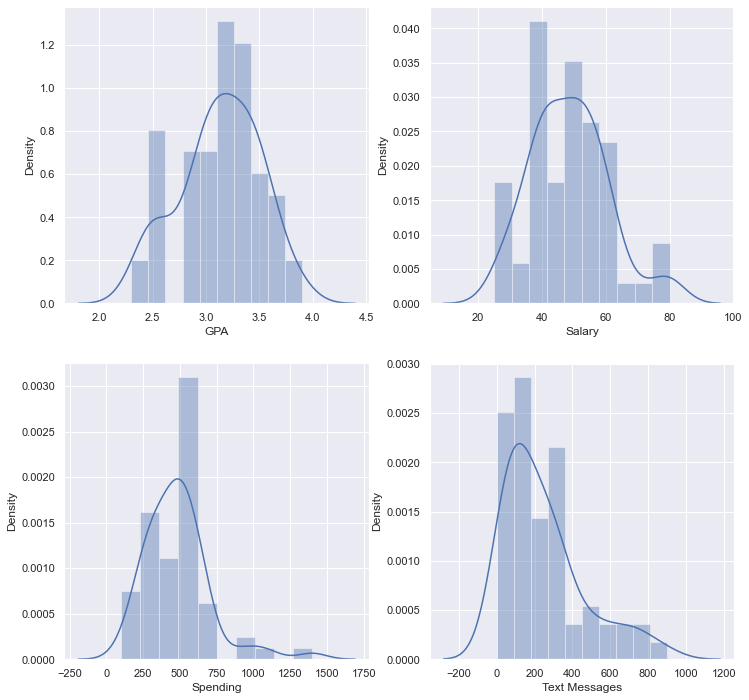

In [112]:
plt.figure(figsize=[12,12])

plt.subplot(2, 2, 1)
sns.distplot(survey['GPA'], bins = 10, kde=True);
print('skew value of GPA is', survey['GPA'].skew())
print('Shapiro resul of GPA is ',shapiro(survey["GPA"]))

plt.subplot(2, 2, 2)
sns.distplot(survey['Salary'], bins = 10, kde=True);
print('skew value of Salary is', survey['Salary'].skew())
print('Shapiro resul of Salary is ',shapiro(survey["Salary"]))

plt.subplot(2, 2, 3)
sns.distplot(survey['Spending'], bins = 10, kde=True);
print('skew value of Spending is', survey['Spending'].skew())
print('Shapiro resul of Spending is ',shapiro(survey["Spending"]))

plt.subplot(2, 2, 4)
sns.distplot(survey['Text Messages'], bins = 10, kde=True);
print('skew value of Text Message is', survey['Text Messages'].skew())
print('Shapiro resul of Text Messages is ',shapiro(survey["Text Messages"]))

plt.show()

# Problem 3

### An important quality characteristic used by the manufacturers of ABC asphalt shingles is the amount of moisture the shingles contain when they are packaged. Customers may feel that they have purchased a product lacking in quality if they find moisture and wet shingles inside the packaging.   In some cases, excessive moisture can cause the granules attached to the shingles for texture and coloring purposes to fall off the shingles resulting in appearance problems. To monitor the amount of moisture present, the company conducts moisture tests. A shingle is weighed and then dried. The shingle is then reweighed, and based on the amount of moisture taken out of the product, the pounds of moisture per 100 square feet are calculated. The company would like to show that the mean moisture content is less than 0.35 pounds per 100 square feet

### The file (A & B shingles.csv) includes 36 measurements (in pounds per 100 square feet) for A shingles and 31 for B shingles.

In [113]:
shingles= pd.read_csv('A+%26+B+shingles.csv')
shingles.head()

,A,B
0,0.44,0.14
1,0.61,0.15
2,0.47,0.31
3,0.30,0.16
4,0.15,0.37


In [114]:
shingles.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36 entries, 0 to 35
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   A       36 non-null     float64
 1   B       31 non-null     float64
dtypes: float64(2)
memory usage: 704.0 bytes


In [117]:
shingles.describe(include = 'all').T

,count,mean,std,min,25%,50%,75%,max
A,36.00,0.32,0.14,0.13,0.21,0.29,0.39,0.72
B,31.00,0.27,0.14,0.10,0.16,0.23,0.40,0.58


## 3.1 Do you think there is evidence that means moisture contents in both types of shingles are within the permissible limits? State your conclusions clearly showing all steps.

### Sample A

### Step 1: Define Null and alternate hypothesis

#### i) Null hypothesis (H0) = mean moisture content ≤ 0.35 
#### ii) Alternate hypothesis (H1) = mean moisture content > 0.35 

### Step 2: Decide the significance level

#### Since the α value is not given we assume α = 0.05 

### Step 3: Identify the test stastistic

#### Since we don’t know the population standard deviation and the sample size (n) of sample A is less ie, 36 so we can proceed with 1 sample t-test. Test is one tail test

### Step 4: Calculate the statistic and p-value 

In [140]:
t_statistic, p_value = ttest_1samp(shingles['A'],0.35)
print('tstat',t_statistic)    
print('P Value',p_value/2)

tstat -1.4735046253382782
P Value 0.07477633144907513


### Step 5: Decide to reject or accept the null hypothesis

In [142]:
# p_value < 0.05 => alternative hypothesis:

alpha_value = 0.05 # Level of significance
print('Level of significance: %.2f' %alpha_value)

if (p_value/2) < alpha_value: 
    print('We have evidence to reject the null hypothesis since p value < Level of significance')
else:
    print('We have no evidence to reject the null hypothesis since p value > Level of significance') 

print ("Our one-sample t-test p-value=", p_value/2)
    

Level of significance: 0.05
We have no evidence to reject the null hypothesis since p value > Level of significance
Our one-sample t-test p-value= 0.07477633144907513


### Sample B

### Step 1: Define Null and alternate hypothesis

#### i) Null hypothesis (H0) = mean moisture content ≤ 0.35 
#### ii) Alternate hypothesis (H1) = mean moisture content > 0.35 

### Step 2: Decide the significance level

#### Since the α value is not given we assume α = 0.05 

### Step 3: Identify the test stastistic

#### Since we don’t know the population standard deviation and the sample size (n) of sample B is less ie, 31 so we can proceed with 1 sample t-test. Test is one tail test

### Step 4: Calculate the statistic and p-value 

In [143]:
t_statistic, p_value = ttest_1samp(shingles['B'].dropna(),0.35)
print('tstat',t_statistic)    
print('P Value',p_value/2)

tstat -3.1003313069986995
P Value 0.0020904774003191813


### Step 5: Decide to reject or accept the null hypothesis

In [144]:
# p_value < 0.05 => alternative hypothesis:

alpha_value = 0.05 # Level of significance
print('Level of significance: %.2f' %alpha_value)

if (p_value/2) < alpha_value: 
    print('We have evidence to reject the null hypothesis since p value < Level of significance')
else:
    print('We have no evidence to reject the null hypothesis since p value > Level of significance') 

print ("Our one-sample t-test p-value=", p_value/2)
    

Level of significance: 0.05
We have evidence to reject the null hypothesis since p value < Level of significance
Our one-sample t-test p-value= 0.0020904774003191813


## 3.2 Do you think that the population mean for shingles A and B are equal? Form the hypothesis and conduct the test of the hypothesis. What assumption do you need to check before the test for equality of means is performed

### Step 1: Define Null and alternate hypothesis

#### i) Null hypothesis (H0): µ (Shingle A) = µ (Shingle B) 
#### ii) Alternate hypothesis (H1): µ (Shingle A) ≠ µ (Shingle B) 

### Step 2: Decide the significance level

#### Since the α value is not given we assume α = 0.05 

### Step 3: Identify the test stastistic

####    We have two samples here and we do not know the standard deviation and sample size is very less so let us follow independent two sample t-test. Therefore it is a two tail test 

### Step 4: Calculate the statistic and p-value 

In [145]:
t_statistic, p_value  = ttest_ind(shingles['A'],shingles['B'].dropna())
print('tstat',t_statistic)    
print('P Value',p_value)

tstat 1.289628271966112
P Value 0.2017496571835328


### Step 5: Decide to reject or accept the null hypothesis

In [146]:
# p_value < 0.05 => alternative hypothesis:
# they don't have the same mean at the 5% significance level
print ("two-sample t-test p-value=", p_value)

alpha_level = 0.05

if p_value < alpha_level:
    print('We have enough evidence to reject the null hypothesis in favour of alternative hypothesis')
    print('We conclude that the population mean of shingles A and B are not equal')
else:
    print('We do not have enough evidence to reject the null hypothesis in favour of alternative hypothesis')
    print('We conclude that the population mean of shingles A and B are equal')

two-sample t-test p-value= 0.2017496571835328
We do not have enough evidence to reject the null hypothesis in favour of alternative hypothesis
We conclude that the population mean of shingles A and B are equal
